In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV

In [2]:
#ex 1
#Import with pandas the file iris_teach_2.csv into the pandas DataFrame with the name df_iris.
df_iris = pd.read_csv('iris_teach_2.csv')
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
148                6.7               3.0                5.2               2.3   
149                6.3               2.5                5.0               1.9   
150                6.5               3.0                5.2               2.0   
151                6.2               3.4                5.4               2.3   
152                5.9               3.0                5.1               1.8   

     iris_name  
0       se

In [3]:
#ex2
#use the method isnull() from the class DataFrame to check if
#there are empty cells in the dataset. (Hint: check the documentation and use this method with respect to your DataFrame object; 
#use the method .sum() to the result to count the empty cells on columns)
df_iris.isna().sum()

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64

In [4]:
#ex3
#We see that we have some empty cells on some rows. Delete these rows (hint: use the method dropna() from pandas.DataFrame class, with the argument inplace=True). Check the documentation why we use that argument 
#(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)!
df_iris.dropna(inplace=True)
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64

In [6]:
#ex4
#Divide the dataset in two parts: a set X for features and y for target.
# X = df_iris.drop('iris_name', axis=1)
# y = df_iris['iris_name']

# print(X)
# print(y)
X = df_iris.loc[:, df_iris.columns != "iris_name"]
y = df_iris.loc[:, ['iris_name']]
print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
  iris_name
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa


In [8]:
#ex5
#Create a LabelEncoder object to encode the classes from the target. Fit it with the y list, and encode y with it. 
#le = LabelEncoder()
#le.fit(y)
# fit and transform the target variable
#y = le.transform(y)
#print(y)

le = LabelEncoder().fit(y['iris_name'])
y['iris_name'] = le.transform(y['iris_name'])
print(y.head())

   iris_name
0          0
1          0
2          0
3          0
4          0


In [9]:
#ex6
#Divide the dataset in a training and a testing set as we did it in the previous laboratory with the sklearn function train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
#ex7
#Drop the petal width column from the database and create a decision tree in a similar way with the example.
#ex8
#Find the proper depth and evaluate the score for the decision tree model that you build.
X = X.loc[:, X.columns != "petal width (cm)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [11]:
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8]} 

grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 

grid_search.fit(X_train, y_train) 

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 2}


Accuracy: 0.97


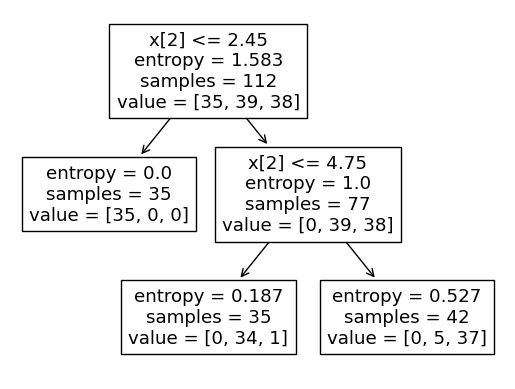

In [12]:
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
tree_clf_tuned.fit(X_train, y_train)

plot_tree(tree_clf_tuned)

y_pred = tree_clf_tuned.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))